In [2]:
import torch 
from torch import nn

from sklearn.model_selection import train_test_split

In [3]:
from sklearn import datasets # to create makemoon dataset 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
X,y = datasets.make_moons(n_samples=1000,
                        noise=0.2,
                        random_state=42)

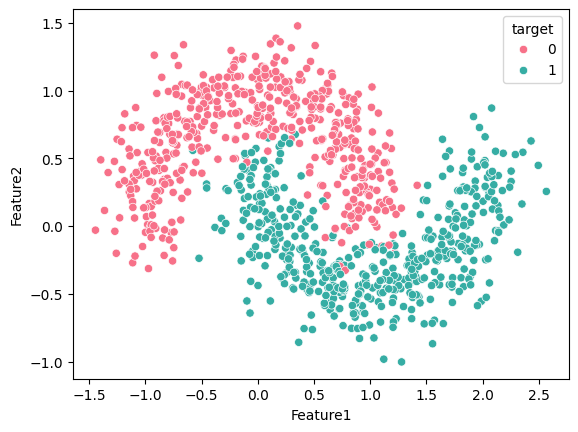

In [7]:
data_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data_df['target'] = y

# Visualize the data distribution
sns.scatterplot(x='Feature1', y='Feature2', hue='target', data=data_df, palette='husl')
plt.show()

In [5]:
data_df.head()

,Feature1,Feature2,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [6]:
x = data_df.drop(columns='target')
y = data_df['target']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23,shuffle=True,stratify=y)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 2) (800,) (200, 2) (200,)


In [8]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)  
y_train = torch.tensor(y_train.values, dtype=torch.float32)  
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)  

In [9]:

class Classificationmodel32(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2,out_features=3)
        self.linear2 = nn.Linear(in_features=3,out_features=6)
        self.linear3 = nn.Linear(in_features=6,out_features=3)
        self.linear4 = nn.Linear(in_features=3,out_features=1)

        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.tanh(x)

        x = self.linear2(x)
        x = self.tanh(x)
        
        x = self.linear3(x)
        x = self.tanh(x)
        
        x = self.linear4(x)
        x = self.sigmoid(x)

        return x.squeeze()


In [10]:
model2 = Classificationmodel32()
model2.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.6419, -0.0354],
                      [-0.2172,  0.6154],
                      [ 0.5242,  0.2167]])),
             ('linear1.bias', tensor([-0.4588, -0.3897, -0.5665])),
             ('linear2.weight',
              tensor([[ 0.3972, -0.5072, -0.2304],
                      [-0.1295, -0.0093,  0.2632],
                      [-0.0983,  0.0619, -0.1193],
                      [ 0.4979,  0.5770,  0.5693],
                      [-0.4288, -0.0311, -0.4928],
                      [ 0.1839, -0.4210, -0.2046]])),
             ('linear2.bias',
              tensor([ 0.4266, -0.3143, -0.5234, -0.0015,  0.0923, -0.2009])),
             ('linear3.weight',
              tensor([[ 0.1697, -0.0247,  0.0310, -0.1212, -0.0028,  0.1048],
                      [-0.3344, -0.3737, -0.2810,  0.3249,  0.0718, -0.0370],
                      [ 0.2878,  0.0278, -0.1428,  0.2944,  0.0857, -0.2395]])),
             ('linear3.bias', tensor([ 0.3857, -0.12

In [11]:
# Create the loss function
loss_fn = nn.BCELoss() # Binary Cross Entropy for Binary Classification Data 

# Create the optimizer
optimizer = torch.optim.Adam(params=model2.parameters(), # parameters of target model2 to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [12]:
torch.manual_seed(42)

epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

    # Put model2 in training mode (this is the default state of a model2)
    model2.train() 

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model2(x_train)

    # 2. Calculate the loss (how different are our model2s predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

  ### Testing

    # Put the model2 in evaluation mode
    model2.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model2(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.7133124470710754 | MAE Test Loss: 0.7047290205955505 
Epoch: 100 | MAE Train Loss: 0.30308496952056885 | MAE Test Loss: 0.31777501106262207 
Epoch: 200 | MAE Train Loss: 0.26840993762016296 | MAE Test Loss: 0.2752705514431 
Epoch: 300 | MAE Train Loss: 0.07207030057907104 | MAE Test Loss: 0.0916651040315628 
Epoch: 400 | MAE Train Loss: 0.0665208175778389 | MAE Test Loss: 0.087751604616642 
Epoch: 500 | MAE Train Loss: 0.06406773626804352 | MAE Test Loss: 0.08516484498977661 
Epoch: 600 | MAE Train Loss: 0.06160245090723038 | MAE Test Loss: 0.0800061896443367 
Epoch: 700 | MAE Train Loss: 0.059077188372612 | MAE Test Loss: 0.07606115192174911 
Epoch: 800 | MAE Train Loss: 0.057155679911375046 | MAE Test Loss: 0.0759609043598175 
Epoch: 900 | MAE Train Loss: 0.05593979358673096 | MAE Test Loss: 0.07760103791952133 


In [16]:
y_pred = model2(x_train)
y_pred_val = []

for i in y_pred:
    if i > 0.5:
        y_pred_val.append(1)
    else:
        y_pred_val.append(0)

y_pred_val = np.transpose(y_pred_val)

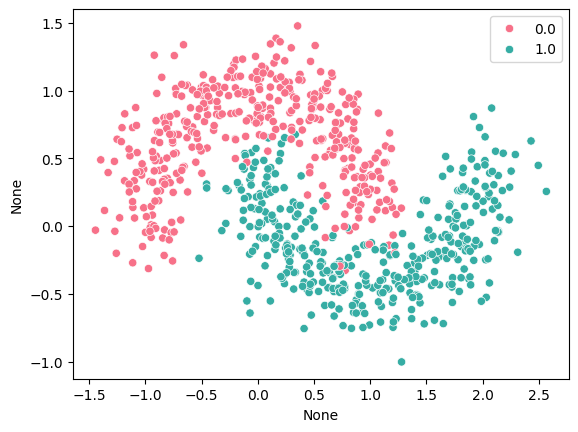

In [17]:
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train.detach().numpy(), palette='husl')
plt.show()

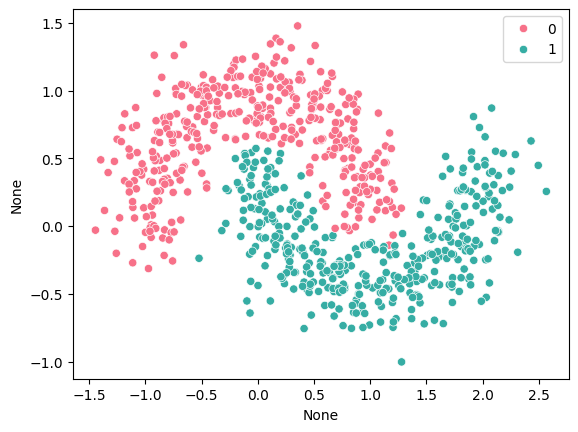

In [18]:
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_pred_val, palette='husl')
plt.show()